 - 데이터셋 : 보스턴 집값
 - 알고리즘 : 선형회귀모델

[1] 모듈 로딩 및 데이터 준비

In [71]:
# 모듈 로딩
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer
import pandas as pd
from sklearn.model_selection import train_test_split

In [72]:
# 데이터 로딩
bostonDF = pd.read_csv(r'C:\Users\KDP-17\EX_PANDAS6\MachineLearning\data\boston.csv')
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [73]:
# 상관관계 분석 <== 피쳐 설정 위함
bostonDF.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [74]:
# RAD 컬럼 삭제
bostonDF.drop(labels='RAD',axis=1,inplace=True)

[2] 모델 준비
 - 학습방법 : 지도학습 > 회귀
 - 알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [75]:
torch.manual_seed(1)

In [76]:
# in_features : 13개
# out_features : 1개
model = nn.Linear(12,1)

In [77]:
# 가중치와 절편 확인
for name, name_parameter in model.named_parameters() :
    print(f'[{name}], [{name_parameter}]')

[weight], [Parameter containing:
tensor([[ 0.1487, -0.1274, -0.0560,  0.1355, -0.2718,  0.1731, -0.0594,  0.1469,
          0.0401, -0.0353,  0.0801,  0.0142]], requires_grad=True)]
[bias], [Parameter containing:
tensor([0.1054], requires_grad=True)]


[3] 최적화 인스턴스 준비

In [78]:
### 모델의 가중치와 절편 최적화 이후 인스턴스에 전잘
adam_optimizer = optimizer.Adam(model.parameters(), lr=0.1)

[4] 학습 진행

In [79]:
# 데이터셋 준비
featureTS = torch.from_numpy(bostonDF[bostonDF.columns[:-1]].values).float()

targetTS = torch.from_numpy(bostonDF[[bostonDF.columns[-1]]].values).float()

print(featureTS.shape, targetTS.shape)

# Train, test
X_train, X_test, y_train, y_test = train_test_split(featureTS,targetTS,
                                                    test_size=0.2)

# Train, Valid
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,
                                                    test_size=0.2)

print(f'X_train.shape : {X_train.shape}, X_test.sahpe : {X_test.shape}, X_val.shape : {X_val.shape}')
print(f'y_train.shape : {y_train.shape}, y_test.sahpe : {y_test.shape}, y_val.shape : {y_val.shape}')

torch.Size([506, 12]) torch.Size([506, 1])
X_train.shape : torch.Size([323, 12]), X_test.sahpe : torch.Size([102, 12]), X_val.shape : torch.Size([81, 12])
y_train.shape : torch.Size([323, 1]), y_test.sahpe : torch.Size([102, 1]), y_val.shape : torch.Size([81, 1])


- 학습횟수 결정 => 에포크 설정
- 학습결과 저장 => 손실저장 변수 설정

In [80]:
EPOCH = 100

In [81]:
# 모델 테스트/검증 함수 
# ==> 가중치,절편 업데이트 X 그래서 최적화 미진행 해야함
# ==> 현재 가중치와 절편으로 테스트 진행
def testing(testTS, targetTS, kind = 'Val') :

    with torch.no_grad() :      # 가중치 및 절편 업데이트 X
        # (1) 학습진행 forward
        pre_y = model(testTS)

        # (2) 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
       
        # (3) 학습 과정 출력
        print(f'[{kind}] LOSS : {loss}')

    return loss

In [82]:
# 모델 학습 함수
def training(featureTS, targetTS, valTS, valTargetTS) :
    
    loss_history = [[],[]]

    for epoch in range(EPOCH) : 
        # (1) 학습진행 forward
        pre_y = model(featureTS)

        # (2) 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
        loss_history[0].append(loss.item())
       
        # (3) 최적화 - 가중치, 절편 업데이트
        adam_optimizer.zero_grad()
        loss.backward()
        adam_optimizer.step()

        val_loss = testing(valTS,valTargetTS)
        loss_history[1].append(val_loss.item())


        # (4) 학습 과정 출력
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [83]:
# 모델 학습 진행
loss = training(X_train,y_train,X_val,y_val)

[Val] LOSS : 5675.513671875
[0/100] LOSS : 494.5773010253906
[Val] LOSS : 672.8796997070312
[1/100] LOSS : 5276.81640625
[Val] LOSS : 1099.2938232421875
[2/100] LOSS : 605.9453735351562
[Val] LOSS : 2905.390380859375
[3/100] LOSS : 1067.6258544921875
[Val] LOSS : 1806.97216796875
[4/100] LOSS : 2794.61669921875
[Val] LOSS : 271.2818603515625
[5/100] LOSS : 1742.73046875
[Val] LOSS : 368.4911193847656
[6/100] LOSS : 265.249267578125
[Val] LOSS : 1399.4326171875
[7/100] LOSS : 333.1829528808594
[Val] LOSS : 1578.556396484375
[8/100] LOSS : 1294.94921875
[Val] LOSS : 788.2984008789062
[9/100] LOSS : 1464.6220703125
[Val] LOSS : 125.61280822753906
[10/100] LOSS : 727.0586547851562
[Val] LOSS : 271.4837341308594
[11/100] LOSS : 114.03009796142578
[Val] LOSS : 802.0371704101562
[12/100] LOSS : 264.404052734375
[Val] LOSS : 915.755859375
[13/100] LOSS : 773.50146484375
[Val] LOSS : 508.1172790527344
[14/100] LOSS : 881.8359985351562
[Val] LOSS : 119.60298156738281
[15/100] LOSS : 491.36972045

In [84]:
loss

[[494.5773010253906,
  5276.81640625,
  605.9453735351562,
  1067.6258544921875,
  2794.61669921875,
  1742.73046875,
  265.249267578125,
  333.1829528808594,
  1294.94921875,
  1464.6220703125,
  727.0586547851562,
  114.03009796142578,
  264.404052734375,
  773.50146484375,
  881.8359985351562,
  491.3697204589844,
  115.39550018310547,
  152.37835693359375,
  445.55218505859375,
  558.871826171875,
  358.1532897949219,
  112.49357604980469,
  99.04471588134766,
  270.4996337890625,
  361.564453125,
  254.11424255371094,
  98.54379272460938,
  81.35823822021484,
  186.11392211914062,
  244.3574676513672,
  176.69976806640625,
  81.2580337524414,
  77.17784881591797,
  144.73403930664062,
  172.374755859375,
  121.38079071044922,
  66.82656860351562,
  77.02816772460938,
  120.25739288330078,
  124.29492950439453,
  84.62162780761719,
  60.091861724853516,
  78.68505096435547,
  101.77409362792969,
  90.89131164550781,
  64.35248565673828,
  61.00604248046875,
  78.80461120605469,
  8

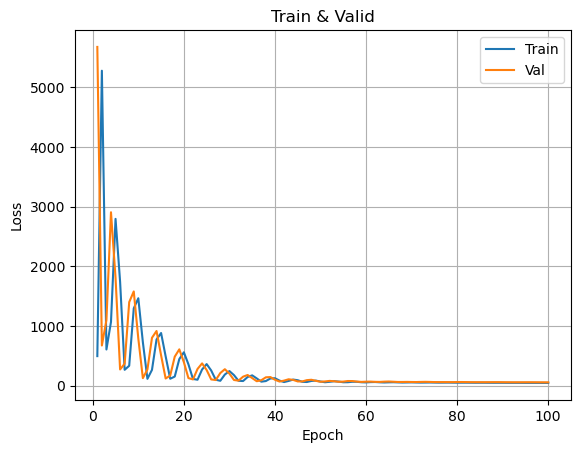

In [85]:
import matplotlib.pyplot as plt

plt.plot(range(1,101),loss[0], label='Train')
plt.plot(range(1,101),loss[1], label='Val')
plt.title('Train & Valid')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()